## Manipulacion de Imágenes

In [ ]:
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

### Scipy trae por defecto la cara de un animalito

In [54]:
f=misc.face()

In [62]:
f

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ..., 
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ..., 
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ..., 
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ..., 
       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ..., 
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ..., 
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ..., 
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,

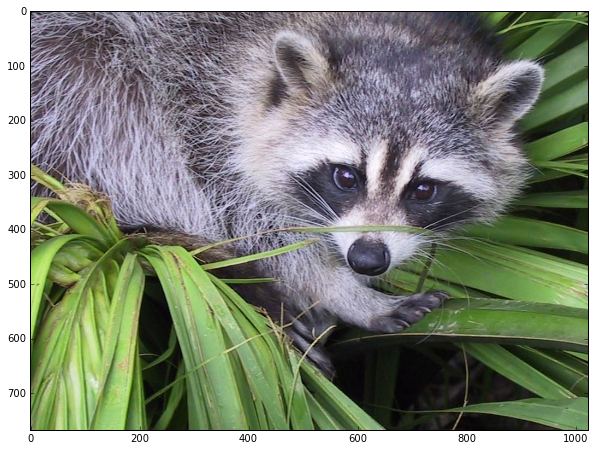

In [63]:
plt.imshow(f)

In [64]:
f.shape

(768, 1024, 3)

In [65]:
fR=f[:,:,0]
fG=f[:,:,1]
fB=f[:,:,2]

El array está organizado así: x(desde el extremo izquierdo superior hacia abajo)-y(desde el extremo izquierdo superior hacia la derecha)

In [66]:
fR.mean(),fG.mean()

(110.67604192097981, 117.72977066040039)

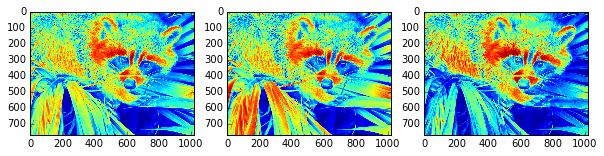

In [67]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(fR)
ax[1].imshow(fG)
ax[2].imshow(fB)

In [68]:
misc.imsave('cara.png', f)

In [69]:
cara = misc.imread('cara.png')

In [70]:
type(cara), cara.shape, cara.dtype

(numpy.ndarray, (768, 1024, 3), dtype('uint8'))

In [71]:
cara.mean(), cara.max(), cara.min()

(110.16274388631184, 255, 0)

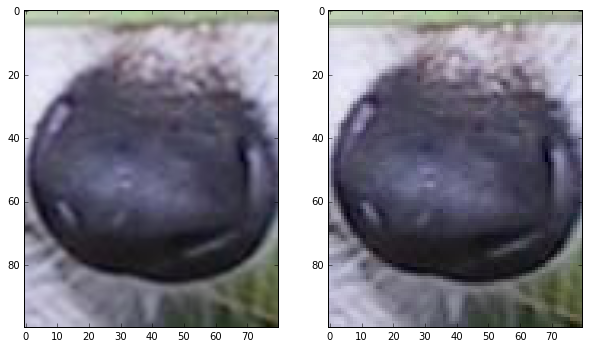

In [72]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(f[400:500, 580:660], cmap=plt.cm.gray)   
ax[1].imshow(f[400:500, 580:660], cmap=plt.cm.gray, interpolation='nearest')

## Image Filtering

- Local filters: replace the value of pixels by a function of the values of neighboring pixels.
- Neighbourhood: square (choose size), disk, or more complicated **structuring element**.

In [77]:
cara_borrosa = ndimage.gaussian_filter(cara, sigma=3)
cara_Muyborrosa = ndimage.gaussian_filter(cara, sigma=50)

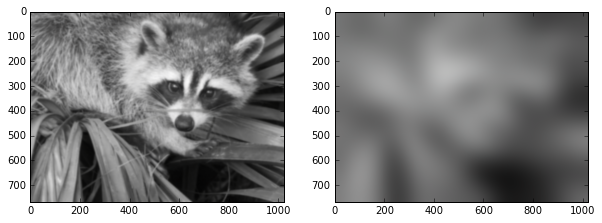

In [78]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cara_borrosa)
ax[1].imshow(cara_Muyborrosa)

### Morfología Matemática

- rank (int): Number of dimensions of the array to which the structuring element will be applied, as returned by np.ndim.
- connectivity (int): connectivity determines which elements of the output array belong to the structure, i.e. are considered as neighbors of the central element. Elements up to a squared distance of connectivity from the center are considered neighbors. connectivity may range from 1 (no diagonal elements are neighbors) to rank (all elements are neighbors).

In [79]:
e1 = ndimage.generate_binary_structure(2,1)

In [80]:
e1.shape

(3, 3)

In [81]:
e1.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

**Erosion** = minimum filter. Replace the value of a pixel by the minimal value covered by the structuring element.:

In [82]:
a = np.zeros((7,7), dtype=np.int)
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [83]:
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [84]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [85]:
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

**Dilation**: maximum filter:

In [86]:
a = np.zeros((5, 5))
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [87]:
a[2, 2] = 1
a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [88]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [99]:
im = np.zeros((64, 64))
x, y = (63*np.random.random((2, 8))).astype(np.int)
im[x, y] = np.arange(8)

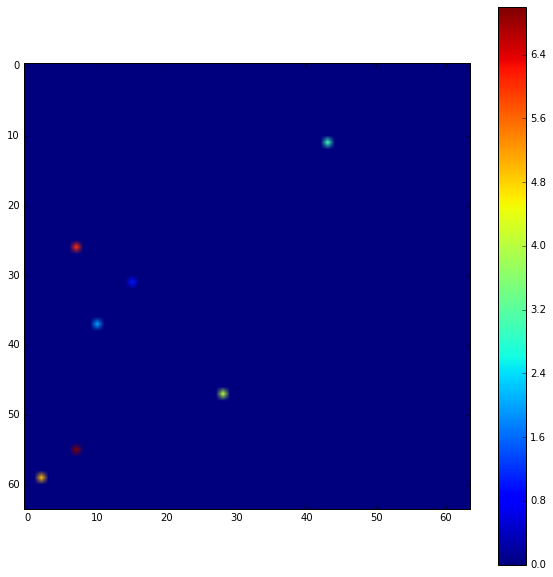

In [100]:
plt.imshow(im)
plt.colorbar()

In [101]:
puntos_grandes = ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))

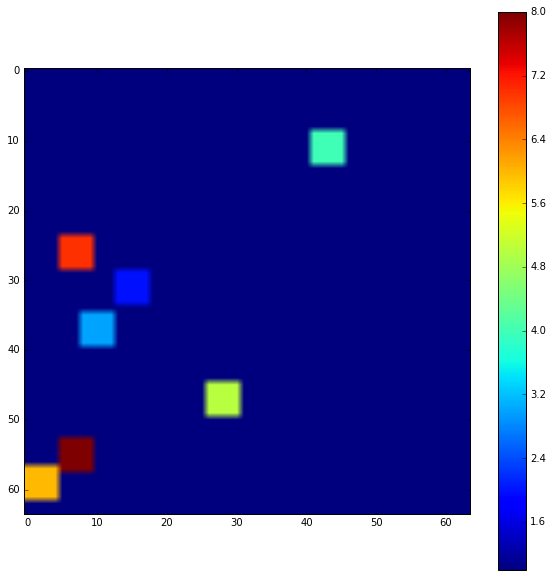

In [102]:
plt.imshow(puntos_grandes)
plt.colorbar()

In [103]:
cuadrado = np.zeros((16, 16))
cuadrado[4:-4, 4:-4] = 1

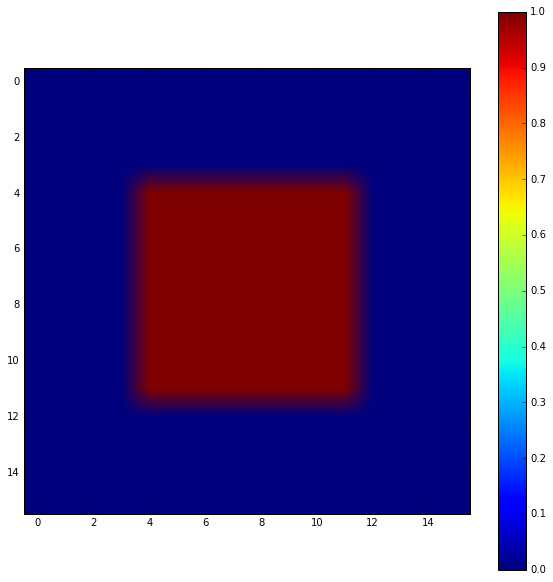

In [104]:
plt.imshow(cuadrado)
plt.colorbar()

In [105]:
dist = ndimage.distance_transform_bf(cuadrado)

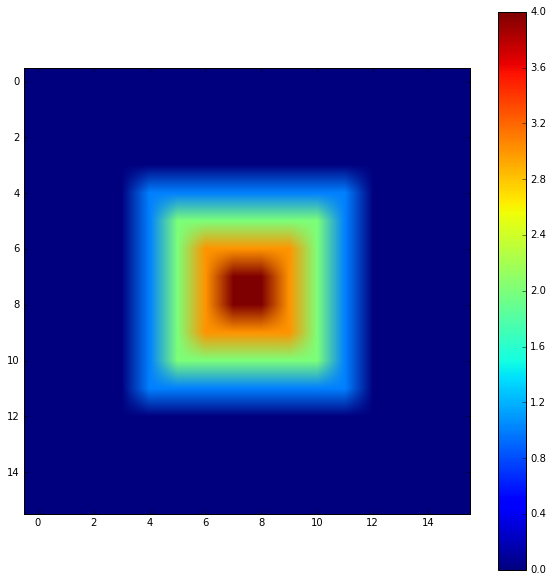

In [106]:
plt.imshow(dist)
plt.colorbar()

In [107]:
dist_dilatada = ndimage.grey_dilation(dist, size=(3, 3),structure=np.ones((3, 3)))

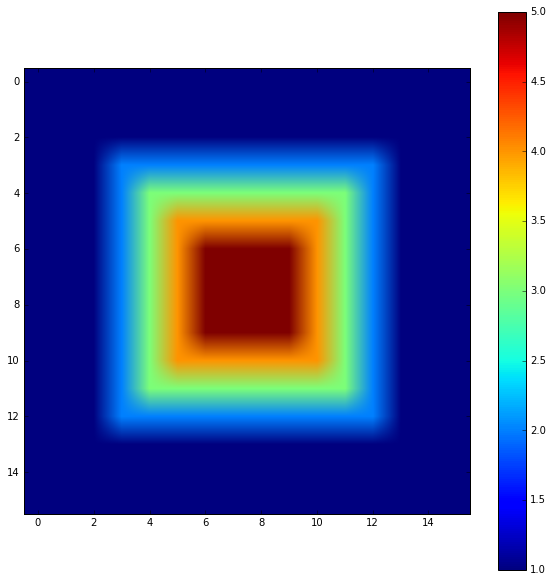

In [108]:
plt.imshow(dist_dilatada)
plt.colorbar()

**Opening**: erosion + dilation:

In [109]:
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [110]:
ndimage.binary_opening(a, structure=np.ones((3,3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [111]:
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

**Application**: remove noise:

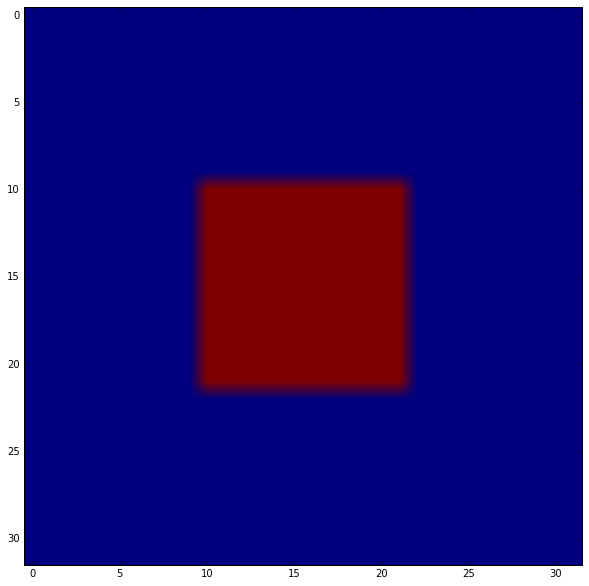

In [112]:
cuadrado = np.zeros((32, 32))
cuadrado[10:-10, 10:-10] = 1
plt.imshow(cuadrado)

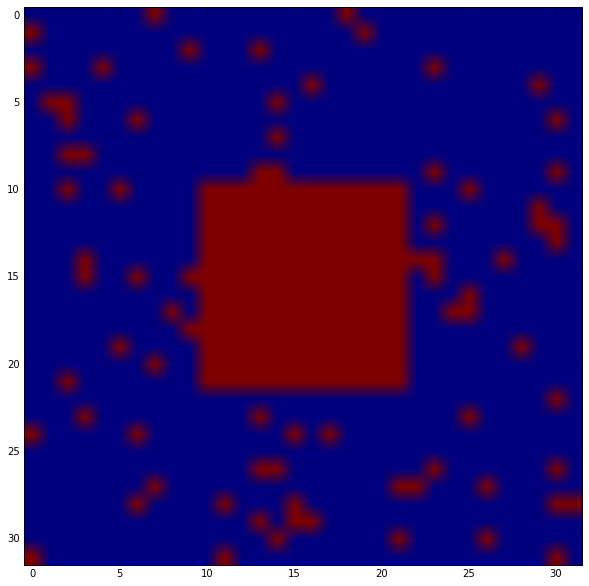

In [121]:
x, y = (32*np.random.random((2, 20))).astype(np.int)
cuadrado[x, y] = 1
plt.imshow(cuadrado)

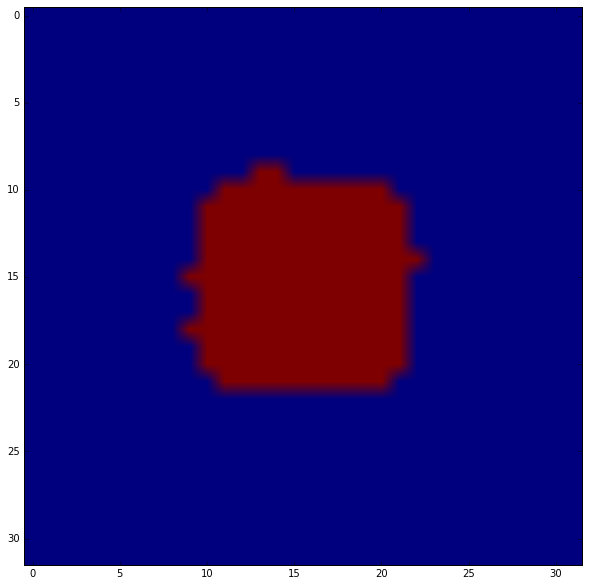

In [122]:
cuadrado_abierto = ndimage.binary_opening(cuadrado)
plt.imshow(cuadrado_abierto)

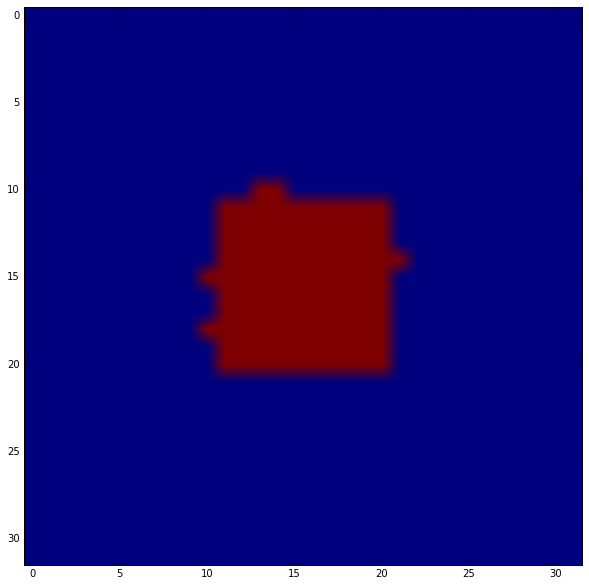

In [123]:
cuadrado_erosionado= ndimage.binary_erosion(cuadrado)
plt.imshow(cuadrado_erosionado)

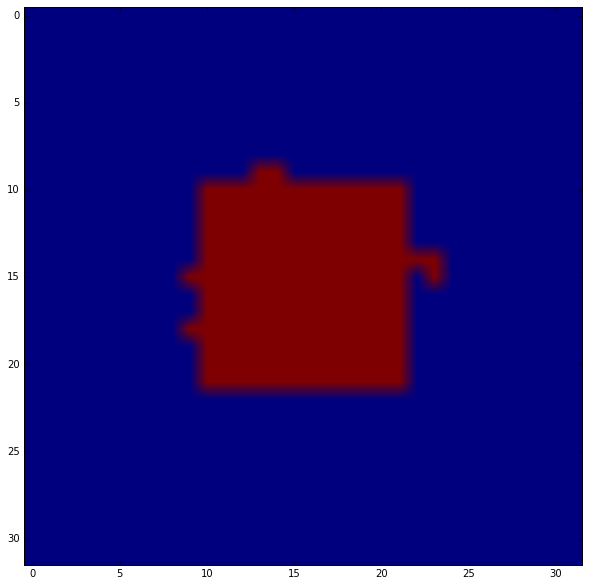

In [124]:
reconstruccion= ndimage.binary_propagation(cuadrado_erosionado, mask=cuadrado)
plt.imshow(reconstruccion)

## Deteccion de Bordes

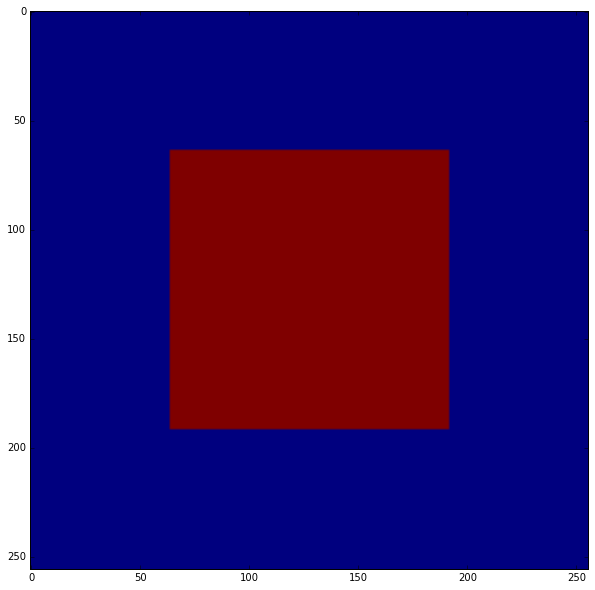

In [125]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1
plt.imshow(im)

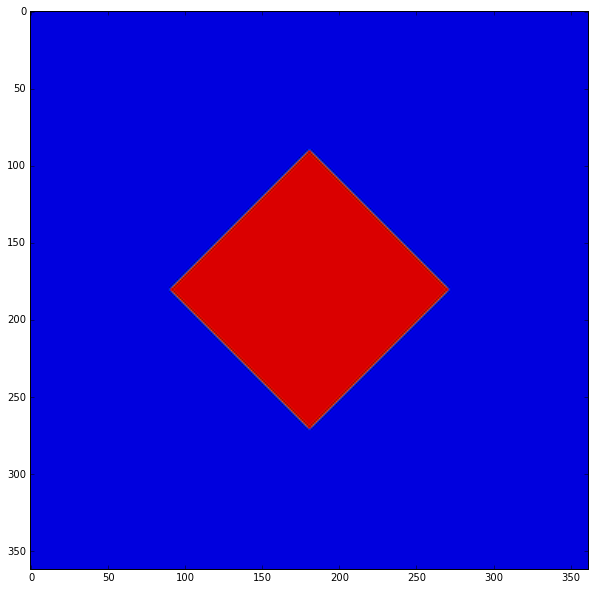

In [126]:
im = ndimage.rotate(im, 45, mode='constant')
plt.imshow(im)

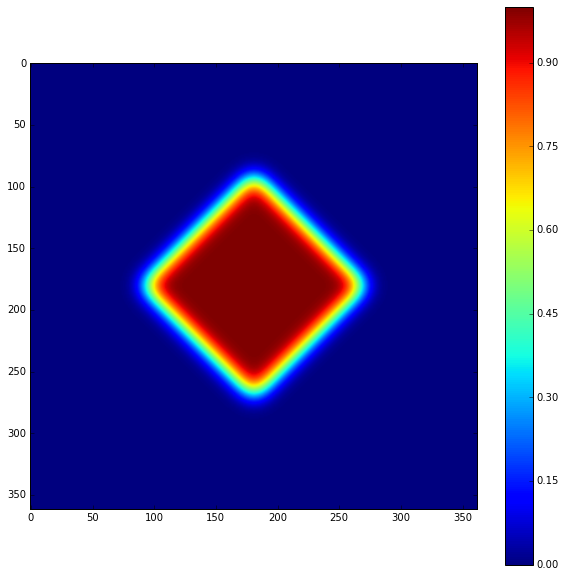

In [127]:
im = ndimage.gaussian_filter(im, 8)
plt.imshow(im)
plt.colorbar()

Use a **gradient operator (Sobel)** to find high intensity variations:

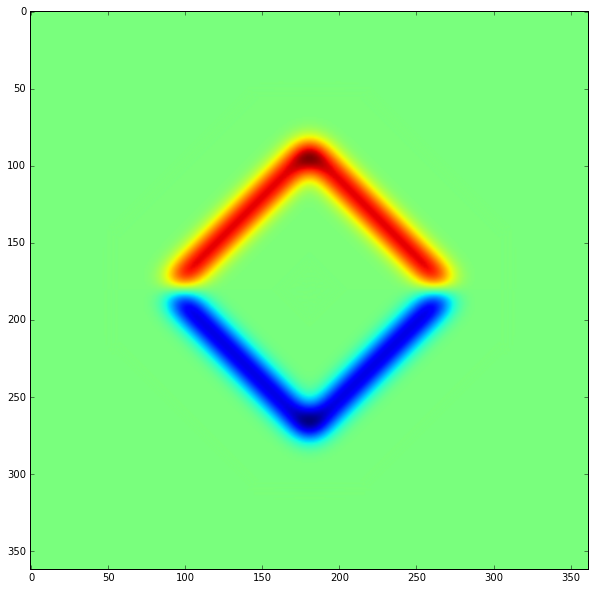

In [128]:
sx = ndimage.sobel(im, axis=0, mode='constant')
plt.imshow(sx)

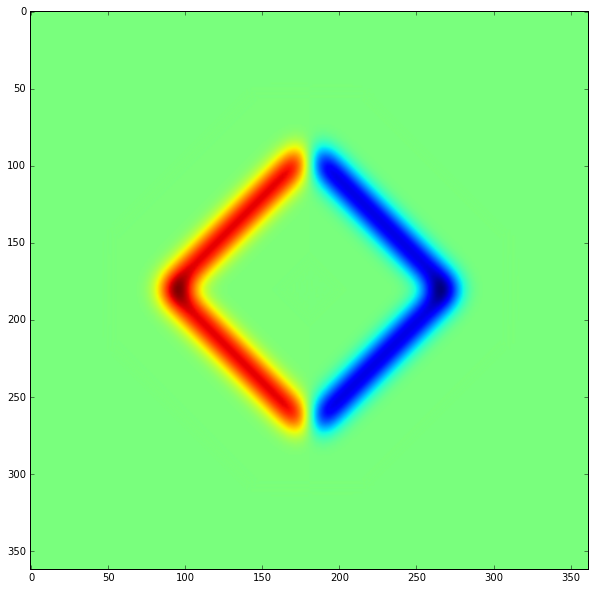

In [129]:
sy = ndimage.sobel(im, axis=1, mode='constant')
plt.imshow(sy)

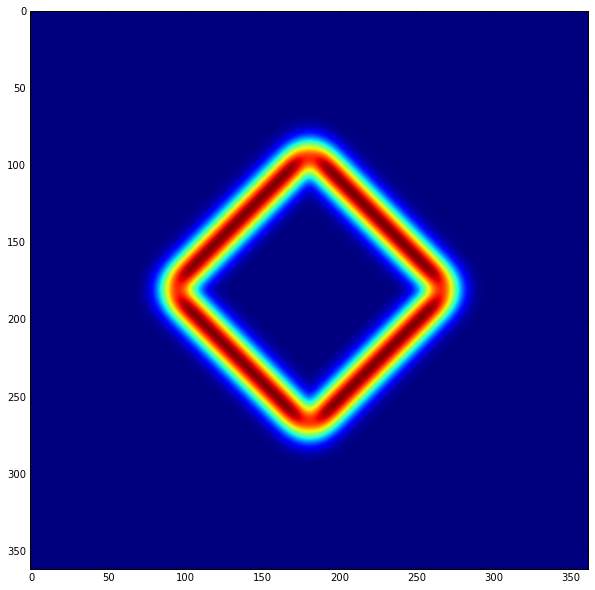

In [130]:
sob = np.hypot(sx, sy)
plt.imshow(sob)

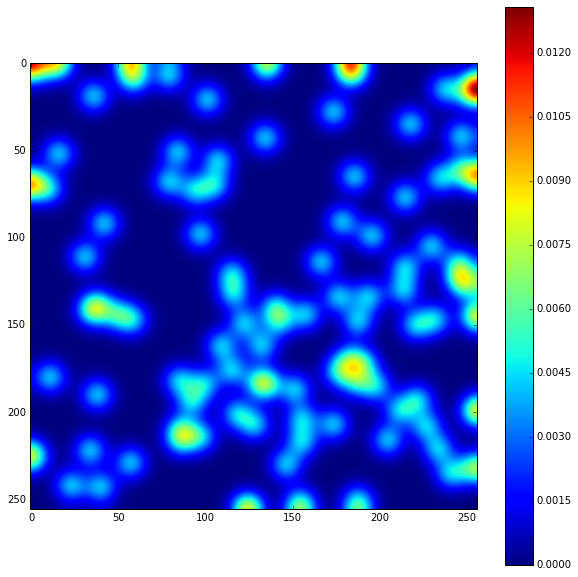

In [131]:
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
plt.imshow(im)
plt.colorbar()

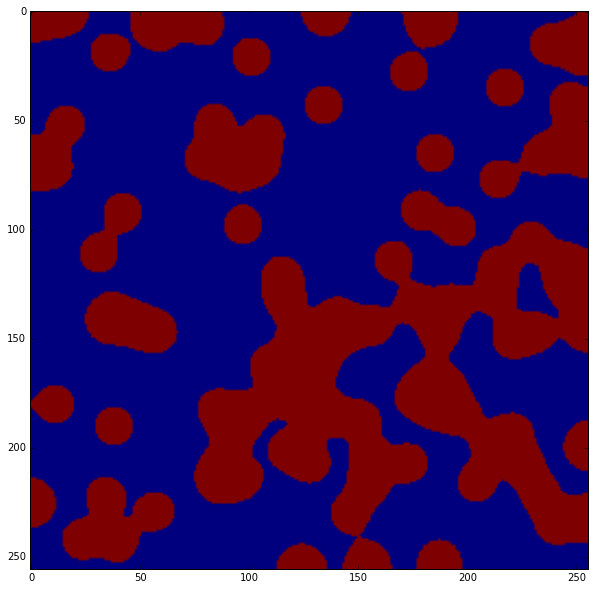

In [133]:
mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
plt.imshow(mask)

### Modifcar los colores

In [134]:
from matplotlib import colors

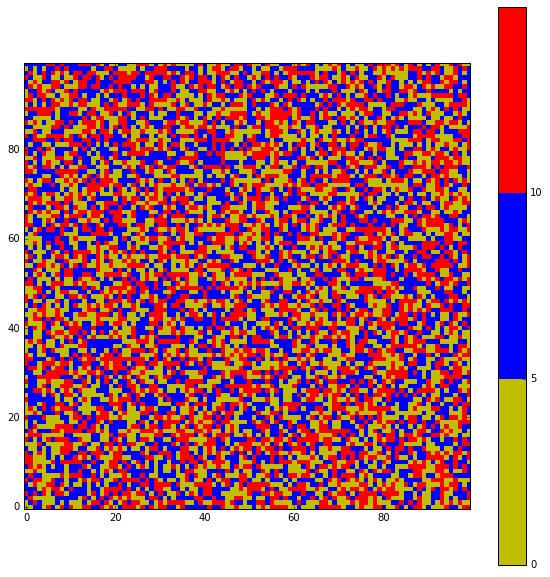

In [135]:
zvals = np.random.rand(100, 100) * 15

cmap = colors.ListedColormap(['y', 'b','r'])
bounds=[0,5,10,15]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(zvals, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10])